## Investigates the airmass of LSST observations in the default survey

In [4]:
import numpy as np
import random
import os
import matplotlib.pylab as plt
%matplotlib inline

os.chdir('/data/des41.a/data/jaortiz/snana-test/')
from python_all.parse_simlib import parse_simlib

In [6]:
#Creates a list of all pointings, with [LIBID, RA, DECL, MJD IDEXPT  FLT GAIN NOISE SKYSIG (pixels)  RATIO  ZPTAVG ZPTERR  MAG]
libid_details, pointings_arr = parse_simlib('simlibs/minion_1016_WFD.simlib')

print len(pointings_arr)

2083758


In [15]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time
import numpy as np

print 'started'
pointings = pointings_arr#[0:100000]

lsst_location = EarthLocation(lat=-32.344633333333334*u.deg, lon=-77.34941666666666*u.deg, height=2652*u.m)
times = pointings[:,3]
time = Time(times, format='mjd')
loc = SkyCoord(ra=pointings[:,1] * u.degree, dec=pointings[:,2] * u.degree)
altaz = loc.transform_to(AltAz(obstime=time,location=lsst_location))  
altitude = altaz.alt.deg

#put limit on airmass, Could be below ~2
zenith_ang = 90 - altitude #in deg
zenith_ang_rad = zenith_ang * np.pi / 180
airmass = 1 / np.cos(zenith_ang_rad)

print max(airmass)

started


Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220
Traceback (most recent call last):
  File "/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/default/lib/python2.7/logging/__init__.py", line 874, in emit
    stream.write(fs % msg)
IOError: [Errno 5] Input/output error
Logged from file logger.py, line 220


2.3024252379


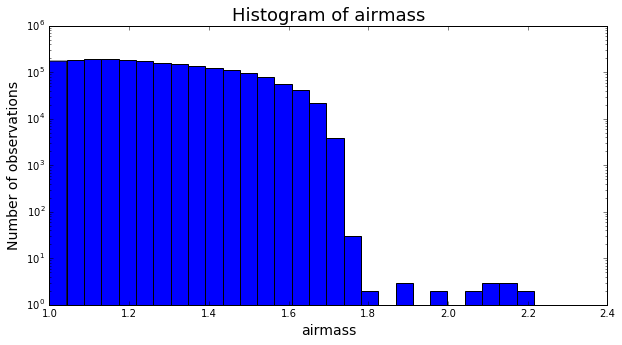

In [31]:
fig1 = plt.figure(figsize=(10,5))
 
# histdata, binedges = np.histogram(airmass, 25)
# binsize = binedges[1] - binedges[0]
# bincentres = binedges[:-1] + binsize/2
# histdata = histdata/float(len(airmass)) 
# plt.plot(bincentres, histdata)


plt.hist(airmass, bins=30)

plt.title('Histogram of airmass', size=18)
plt.yscale('log')
plt.ylabel('Number of observations', size=14)
#plt.xlim(xmax=x_max)
plt.xlabel('airmass', size=14)

plt.show()

fig1.savefig('figures/airmass')